In [1]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)


In [2]:
df=pd.read_csv(r"C:/Users/Admin/loan-train.csv")
df.head(5) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Check number of rows and columns

df.shape

(614, 13)

In [4]:
#Describe entire dataset

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Get information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [7]:
#Check the null values

df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
#Check number of null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [10]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
#This method is for cleaning the data

df_loandata=df.dropna()
df_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [12]:
#All Non-null values are replaced by digit 1 in Dependents column. Thus it has 0 Null-values now

df['Dependents'].fillna(1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# All null values in LoanAmount section is filled by the mean value of its own column to obtain 367 Non-null values

df['LoanAmount'].fillna(df.LoanAmount.mean(),inplace = True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [15]:
#Creating a duplicate column of a column with binary outcomes in character form and appending it in the table 

Value_Mapping = {'Yes' : 1, 'No' : 0}
df['Married_Section'] = df['Married'].map(Value_Mapping)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0


In [16]:
Value_Mapping1 = {'Male' : 1, 'Female' : 0}
df['Gender_Section'] = df['Gender'].map(Value_Mapping1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0


In [17]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
Value_Mapping2 = {'Graduate' : 1, 'Not Graduate' : 0}
df['Edu_Section'] = df['Education'].map(Value_Mapping2)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    611 non-null    float64
 14  Gender_Section     601 non-null    float64
 15  Edu_Section        614 non-null    int64  
dtypes: float64(6), int64(2), o

In [20]:
# Filling all the empty spaces of the following columns having binary outcomes in integer form.

df["Married_Section"].fillna(df.Married_Section.mean(),inplace=True) 

df["Gender_Section"].fillna(df.Gender_Section.mean(),inplace=True)

df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.mean(),inplace=True)

df["Credit_History"].fillna(df.Credit_History.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    614 non-null    float64
 14  Gender_Section     614 non-null    float64
 15  Edu_Section        614 non-null    int64  
dtypes: float64(6), int64(2), o

In [21]:
#Creating a duplicate column of a column with binary outcomes in character form and appending it in the table

Value_Mapping3 = {'Yes' : 1, 'No' : 0}
df['Employed_Section'] = df['Self_Employed'].map(Value_Mapping3)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0,0.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    614 non-null    float64
 14  Gender_Section     614 non-null    float64
 15  Edu_Section        614 non-null    int64  
 16  Employed_Section   582 non

In [23]:
df["Employed_Section"].fillna(df.Employed_Section.mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Married_Section    614 non-null    float64
 14  Gender_Section     614 non-null    float64
 15  Edu_Section        614 non-null    int64  
 16  Employed_Section   614 non

In [24]:
#Filling the empty spaces of the column having more than 2 outcomes in character form.

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["Property_Section"] = lb_make.fit_transform(df["Property_Area"])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section,Property_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1,0.0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,1.0,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0,0.0,2
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2


In [25]:
Value_Mapping4 = {'Y' : 1, 'N' : 0}
df['Loan_Section'] = df['Loan_Status'].map(Value_Mapping4)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Section,Gender_Section,Edu_Section,Employed_Section,Property_Section,Loan_Section
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,1.0,1.0,1,0.0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,1.0,1.0,1,1.0,2,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1.0,1.0,0,0.0,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,0.0,1.0,1,0.0,2,1


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


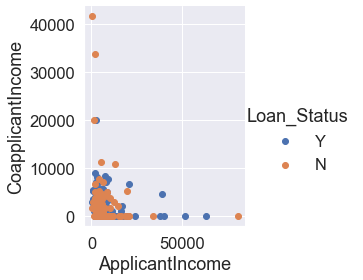

In [54]:
#Scatter plot Diagram

sns.FacetGrid(df,hue="Loan_Status",size=4) \
.map(plt.scatter,"ApplicantIncome","CoapplicantIncome") \
.add_legend()
plt.show()

Text(0, 0.5, 'Count')

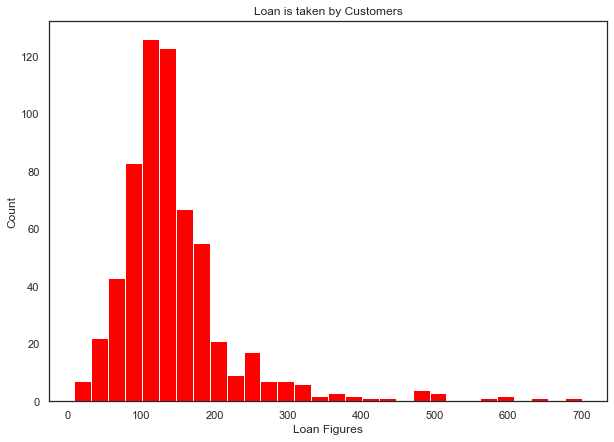

In [27]:
#Histogram

plt.figure(figsize = (10,7)) 
x = df["LoanAmount"] 
plt.hist(x, bins = 30, color = "Red") 
plt.title("Loan is taken by Customers") 
plt.xlabel("Loan Figures") 
plt.ylabel("Count")

Text(0, 0.5, 'Graduate')

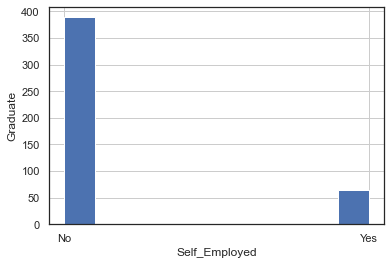

In [28]:
df_temp=df[df["Education"]== "Graduate"]
df_temp["Self_Employed"].hist()
plt.xlabel("Self_Employed") 
plt.ylabel("Graduate")

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


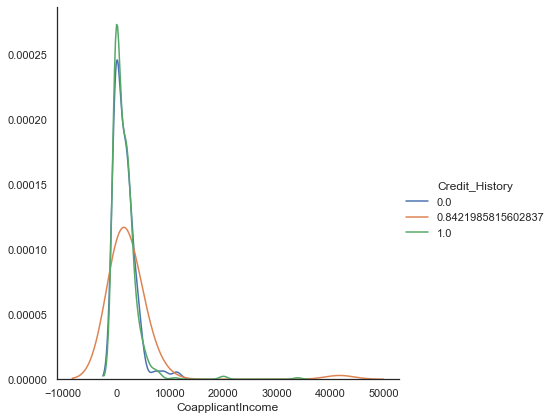

In [29]:
sns.FacetGrid(df, hue="Credit_History", size=6).map(sns.kdeplot, "CoapplicantIncome").add_legend()


<AxesSubplot:xlabel='Property_Area', ylabel='Gender_Section'>

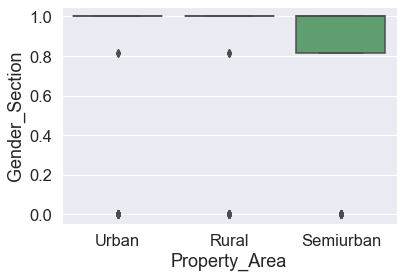

In [56]:
#Box plot

sns.boxplot(x="Property_Area", y="Gender_Section", data=df)

Text(0.5, 1.0, 'Impact of part time job Based on different Age and Gender')

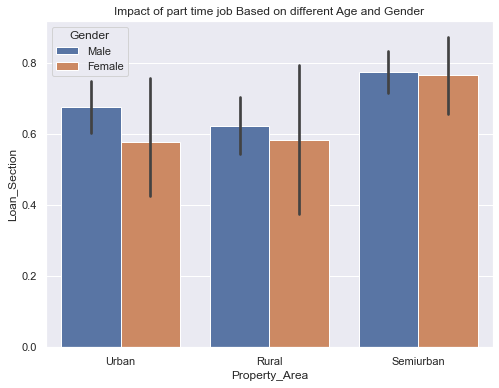

In [60]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.barplot(x = 'Property_Area', y = 'Loan_Section', hue = 'Gender', data = df)
plt.title('')

In [68]:
sns.catplot(x = 'Property_Area', y = 'Loan_Status',hue="Gender",kind="count", data = df)

ValueError: Either `x` or `y` must be None for kind='count'

<AxesSubplot:xlabel='Married_Section', ylabel='ApplicantIncome'>

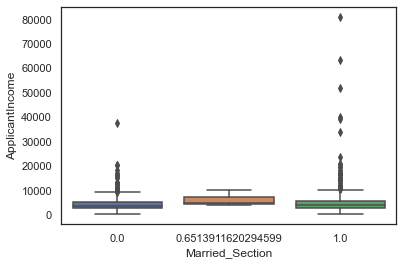

In [31]:
sns.boxplot(x="Married_Section", y="ApplicantIncome", data=df)

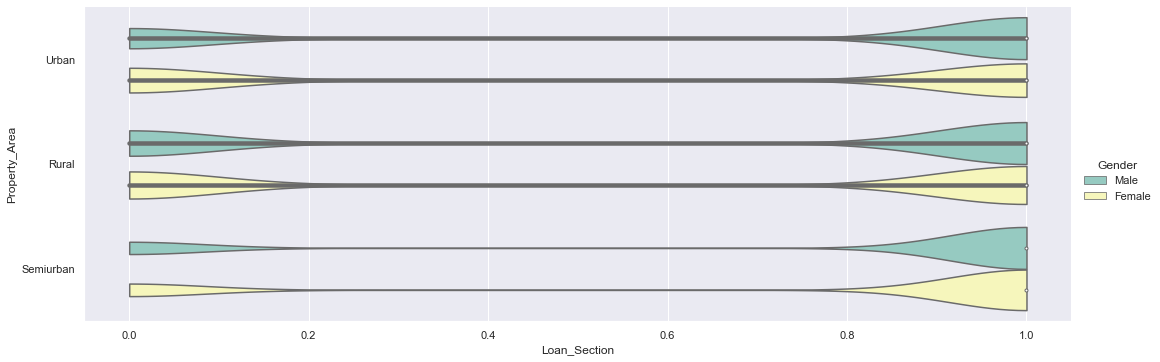

In [88]:

g = sns.catplot(x="Loan_Section", y="Property_Area",
                hue="Gender",
                data=df[df.Property_Area.notnull()],
                orient="h", height=5, aspect=3, palette="Set3",
                kind="violin", dodge=True, cut=0, bw=.2)


In [ ]:
g = sns.catplot(x="Loan_Section", y="Property_Area",
                hue="Gender",
                data=df[df.Property_Area.notnull()],
                orient="h", height=2, aspect=3, palette="Set3",
                kind="bar", dodge=True)

<AxesSubplot:>

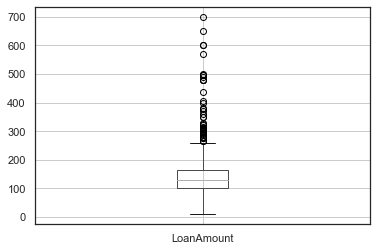

In [32]:
df.boxplot(column="LoanAmount")

<AxesSubplot:>

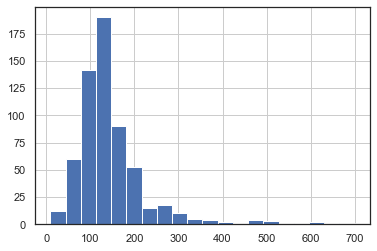

In [33]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

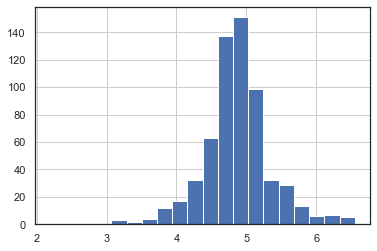

In [34]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

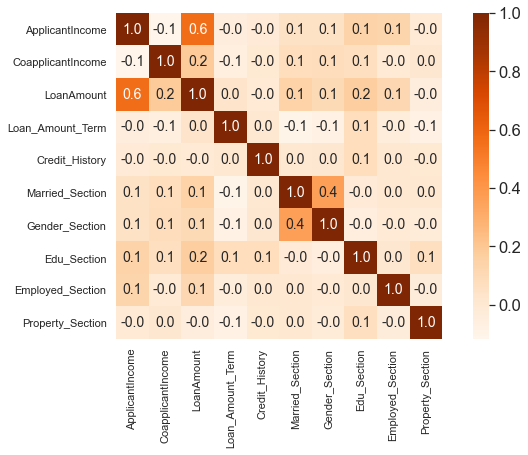

In [35]:
#Confusion Matrix of the columns given below

cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married_Section',
        'Gender_Section','Edu_Section','Employed_Section','Property_Section']
f, ax = plt.subplots(figsize=(11,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cmap='Oranges',
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.1f',
                 annot_kws={'size': 14},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [36]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [37]:
#Give input and output

X=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married_Section',
        'Gender_Section','Edu_Section','Employed_Section','Property_Section']].values
y=df[["Loan_Section"]].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [39]:
#Training the data

model.fit(X_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#Training Accuracy

model.score(X_train,y_train)

0.8018648018648019

In [41]:
#Testing Accuracy

model.score(X_test,y_test)

0.8324324324324325

In [42]:
expected = y_test
predicted = model.predict(X_test)

In [43]:
from sklearn import metrics

In [44]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185



In [45]:
# Out of 53 'Y' outcomes, 25 were right and 28 were wrong similarly, for'N', 129 were right and 3 were wrong.
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(expected,predicted)
cm1

array([[ 23,  28],
       [  3, 131]], dtype=int64)

Text(70.5, 0.5, 'Truth')

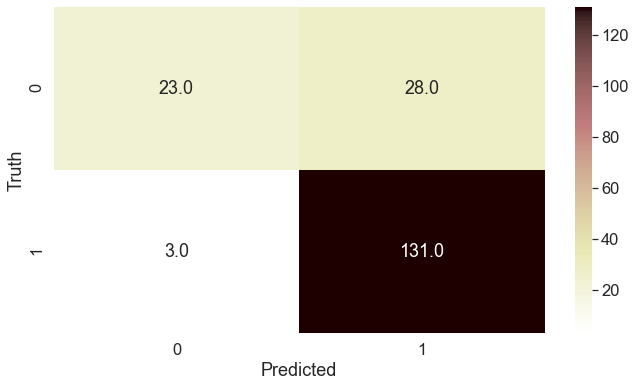

In [46]:
import seaborn as sn
plt.figure(figsize=(11,6))
sn.heatmap(cm1,cmap='pink_r',fmt='.1f',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

<ipython-input-47-70e2e6fb4277>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForestClassifier()

In [48]:
#Training Accuracy

model.score(X_train,y_train)

1.0

In [49]:
#Testing Accuracy

model.score(X_test,y_test)

0.7891891891891892

In [50]:
y_predicted=model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[ 22,  29],
       [ 10, 124]], dtype=int64)

In [52]:
print(metrics.classification_report(expected, y_predicted))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53        51
           1       0.81      0.93      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185



Text(70.5, 0.5, 'Truth')

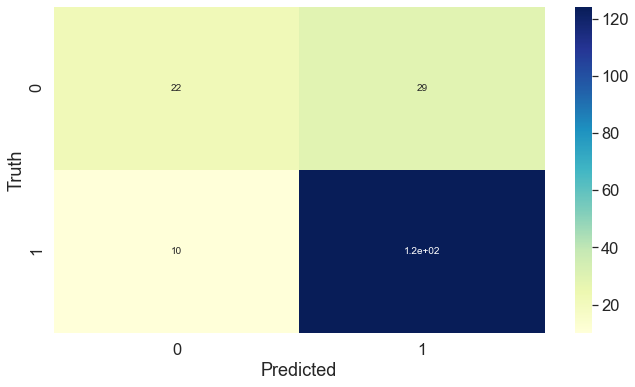

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(11,6))
sn.heatmap(cm,cmap='YlGnBu',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')